# Homework 3b: Bessel Functions
Physics 177, Spring 2018  
**Due:** Tuesday, April 24

*Jeremy Quijano*

## 1. Simpson's Rule Integrator 

Write an integrator function using **Simpson's rule**. The integrator should take the following arguments:
* A function, $f$
* Two real numbers giving the limits of integration, $a$ and $b$
* The number of steps $N$ to sample

There are different ways of implementing Simpson's rule. Here's one example from (5.9) of Newman's *Computational Physics*:

$\displaystyle I(a,b) = \frac{1}{3}\Delta x\left[ f(a) + f(b) + 4 \sum_{k \text{ odd}}^{N-1} f(a+k\Delta x) + 2 \sum_{k \text{ even}}^{N-2} f(a+k\Delta x) \right]$ ,

where the step size is $\Delta x = (b-a)/N$.

**Remark**: this is different from the technique that we used [in class](https://github.com/Physics177-2018/Lecture_04/blob/master/Lecture%204.ipynb)! You may use either technique, as long as it's correct. 

### 1.a) Write up the function

Fill in the stub function below

In [22]:
def integrate_HW3(function_name, lower_limit, upper_limit, Nsteps):
    """
    Returns the integral using Simpson's rule
    """
    
    area = 0.0
    dx = (upper_limit - lower_limit) / Nsteps
    current_step = lower_limit
    
    while current_step + 2 * dx <= upper_limit:
        area += (dx/3) * (function_name(current_step) + 4*function_name(current_step + dx) + function_name(current_step + 2*dx))
        current_step += 2*dx
    
    return area

### 1.b Test your function

Test your function using the cell below. 

In [23]:
def testfun(x):
    return 3*x**2

integrate_HW3(testfun, 0, 1, 100)

0.9411920000000008

**What answer do you expect** from `integrate_HW3(testfun, 0, 1, 100)`?

*Expect to get a value close to 1*

### 1.x) Extra credit: Consistency

Prove why Newman's equation (5.9),

$$\displaystyle I(a,b) = \frac{1}{3}\Delta x\left[ f(a) + f(b) + 4 \sum_{k \text{ odd}}^{N-1} f(a+k\Delta x) + 2 \sum_{k \text{ even}}^{N-2} f(a+k\Delta x) \right]$$ 

is indeed equivalent to the Simpson's rule that we used in Lecture 4:

```python
def Simpson_Nsteps(function_name, num_steps):
    """Simpson rule from lower_limit to upper_limit"""
    delta_x = (upper_limit - lower_limit)/num_steps
    x_low = lower_limit # lower edge of trapezoid
    total = 0.
    
    while x_low + 2*delta_x <= upper_limit: # see why we do this?
        sum_of_terms = function_name(x_low) \
            + 4*function_name(x_low + delta_x) \
            + function_name(x_low + 2*delta_x)
        total += delta_x / 3 * sum_of_terms
        x_low = x_low + 2*delta_x
    
    return total
```

It may be more useful to remember that our `Simpson_Nsteps` function is based on
$$\left(\text{small area}\right)_i = \frac{\Delta x}{3} \left[  f(x_i-\Delta x) + 4f(x_i) + f(x_i+\Delta x)\right] \ .$$
You may write you answer in a markdown box below, or attach a pdf to your GitHub repository and include a link to the pdf in this notebook.

## 2. A Bessel Function
[Adapted from Exercise 5.4 from *Computational Physics* by Newman]

### Discussion

Bessel functions show up all over the place in physics. The Bessel functions $J_m(x)$ are defined by

$\displaystyle J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x \sin \theta) \, d\theta\ ,$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

### 2.a) Code the Bessel Function

Write your own version of the Bessel function by filling in the cell below.

In [135]:
from math import pi as pi
from math import sin as sin
from math import cos as cos

def J(m,x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """
    
    # Your code goes here!
    # Use the integrate_HW2 function from Problem 1
    
    # It may be useful to define a local function for the integrand
    def integrand(theta):
        return 1/pi * cos(m*theta - x*sin(theta))
    
    return integrate_HW3(integrand, 0, pi, 1000) # Can call integrate_HW3 from before instead recoding it

In [136]:
print(J(1,1))

0.44205053310768466


### 2.b) Test your Bessel Function

Test your Bessel function in the following cell: 

In [137]:
print(J(1,1))

0.44205053310768466


The correct answer is $J_1(1)=0.440051$.

### 2.c) Plot the Bessel Function

In this problem we'll use Numpy to **vectorize** our Bessel function so that we can feed it a Numpy array of $x$-values and output a Numpy array of $y$-values. You can read more about vectorizing [here](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.vectorize.html).

For our purposes, it may be useful to just demonstrate an example. Run the following cell.

In [142]:
# EXAMPLE OF HOW TO USE VECTORIZE
import numpy as np

def my_function(x,m):
    """raises x to the power m"""
    return x**m

# Now I'd like to apply this to a Numpy array.
# But this function doesn't know how to handle arrays.
# Let's vectorize it.

my_vectorized_function = np.vectorize(my_function)

# Here's how we can use this:
x = np.linspace(1,4,4)

print("x is an array:")
print(x)
print("")

# Update 4/22: replaced "my_function" with "my_vectorized_function"
print("check these out:")
print(my_vectorized_function(x,1))
print(my_vectorized_function(x,2))
print(my_vectorized_function(x,3))
print(my_vectorized_function(x,4))

x is an array:
[1. 2. 3. 4.]

check these out:
[1. 2. 3. 4.]
[ 1.  4.  9. 16.]
[ 1.  8. 27. 64.]
[  1.  16.  81. 256.]


**Remark 4/22**: Stephen has pointed out that the original code had a typo: `print(my_function(x,1))` instead of `print(my_vectorized_function(x,1))`. He also observed that `my_function` is simple enough that it doesn't have to be vectorized to accept numpy arrays. +1 for house Stephen.

Observe that `np.vectorize` takes a function and outputs another function that can take arrays. There's something even more powerful here: `my_function` takes in *two* arguments. `np.vectorize(my_function)` accepts arrays in both. This means that we can use the following construction. Suppose `x` is a list of sample points for a function $f(a,x)$. Then to get a list of `y` values for a given value of $a$:

```python

# Where f is a function that takes two variables, f(index, x)
f_vec = np.vectorize(f)

x = np.linspace(min_value, max_value, length_of_array)
a = 1

y = f_vec(a, x)
```

Now `x` and `y` can be used to make a plot, as you did in Homework 3a.

**Your job in this problem** is to fill in the following code to produce plots of $J_0(x)$, $J_1(x)$ and $J_2(x)$ in matplotlib.

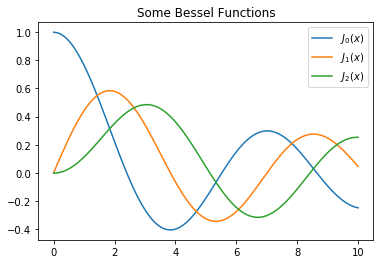

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# x sample points
x = np.linspace(0,10,100)

# vectorize the J function
J_numpy = np.vectorize(J)

y0 = J_numpy(0,x)
y1 = J_numpy(1,x)
y2 = J_numpy(2,x)

plt.plot(x,y0, label='$J_0(x)$')
plt.plot(x,y1, label='$J_1(x)$')
plt.plot(x,y2, label='$J_2(x)$')

plt.title("Some Bessel Functions")
plt.legend()
plt.show()
